#### 專題：爬取PTT專版，整理出流行的詞句與話題
* 選取看板：西洽(C_CHAT)

* 撈取前N頁標題(視情況改，最後用，先以第一頁為測試)
* 將標題丟入jieba斷詞分類(https://ppt.cc/fwWPqx)
* 自定義一些沒有的詞匯入jieba，並帶入繁體中文詞庫
* 用圖表呈現字詞出現的頻率(參考以前ML的檔案)
* 把結果餵給world cloud 呈現

In [30]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import jieba

In [2]:
# 爬頁面

URL = "https://www.ptt.cc/bbs/C_Chat/index.html"
HEADERS = {
    "user-agent": "Chrome/97.0.4692.71"
}
response = requests.get(url=URL, headers=HEADERS)
result = BeautifulSoup(response.text, "html5lib")
#result

In [3]:
# 過濾出標題帶入字串

all_title_text = ""
for i in result.find_all("div", {"class":"r-ent"}):
    
    # 過濾標題會有被刪文後變成Nonetype的狀況
    title_name = i.find(class_="title").a
    if title_name is None:
        pass
    else:
        print(title_name.text)
        all_title_text += title_name.text
        #all_title_text.append(title_name.text)

# 過濾標題的屬性符號&空白
all_title_text = all_title_text.replace("[", "")
all_title_text = all_title_text.replace("]", "")
all_title_text = all_title_text.replace(" ", "")

#去除中文常出現的標點符號(ptt會變成全形)
all_title_text = all_title_text.replace("？", "")
all_title_text = all_title_text.replace("，", "")
all_title_text = all_title_text.replace("。", "")
all_title_text = all_title_text.replace("！", "")

# 去除英文上的標點符號
import string
all_title_text = all_title_text.translate(str.maketrans('', '', string.punctuation))

[閒聊] 巫妖王之怒是不是把太多大咖請出來了？
[阿爾] 奇怪，這個圓陸鯊怎麼抓不起來
Re: [哲學] 為何人類會有"前世/來生"的概念?
Re: [巨人] 艾倫向艾族溫情喊話支持度會不會更高
[問題] 好奇有些遊戲的房子內部格局都一樣?
Re: [閒聊] 有什麼靈異鬧鬼到國家層級的作品嗎？
[閒聊] 君本当中国語上手
[閒聊] 原來以前真的有人跟寶可夢結婚
[問題] 軟弱的男人真的一點魅力都沒有嗎？
[討論] 寶可夢在寶可夢世界裡有精確定義嗎?
[巨人] 阿爾敏這幾年都經歷了什麼才有這種眼神
[閒聊] 櫻蘭高校男公關部裡面最帥的是誰阿？
[縱容] 如果掉到洗翠的是沙優 還是靠抓怪賺錢嗎?
Re: [問題] 六哥招募炭治郎變鬼 為啥墮姬說不要
[公告] 看板活動公告彙整 ＆ 置底推文閒聊區
[公告] C_Chat板板規 v.16.7
[22冬] 冬番各作品首播時間
[公告] C_Chat板主徵選開始&發過年紅包


In [4]:
# 設定jieba
# 使用繁體中文詞庫
jieba.set_dictionary('./Data/dict.txt.big')

# 使用預設的精確模式
print('預設:', '|'.join(jieba.cut(all_title_text, cut_all=False, HMM=True)))

# 自定義字典，把一些專門字詞or術語加入

jieba.load_userdict('./Data/userDict.txt')
#print(jieba.lcut(all_title_text))

Building prefix dict from o:\PyCrawlerMarathon\homework\Data\dict.txt.big ...
Loading model from cache C:\Users\GSX-40~1\AppData\Local\Temp\jieba.u68c22222193cad0ec588c535d654ef9c.cache
Loading model cost 1.124 seconds.
Prefix dict has been built successfully.


預設: 閒聊|巫|妖|王之怒|是不是|把|太多大|咖請|出來|了|阿爾|奇怪|這個|圓陸|鯊|怎麼|抓|不|起來|Re|哲學|為何|人類|會|有|前世|來生|的|概念|Re|巨人|艾倫|向|艾族|溫情|喊話|支持|度會|不會|更高|問題|好奇|有些|遊戲|的|房子|內部|格局|都|一樣|Re|閒聊|有|什麼|靈異|鬧鬼|到|國家|層級|的|作品|嗎|閒聊|君|本当|中国|語上|手|閒聊|原來|以前|真的|有人|跟|寶可夢|結婚|問題|軟弱|的|男人|真的|一點|魅力|都|沒有|嗎|討論|寶可夢|在|寶可夢|世界|裡有|精確|定義|嗎|巨人|阿爾敏|這|幾年|都|經歷|了|什麼|才|有|這種|眼神|閒聊|櫻蘭|高校|男|公關部|裡面|最帥|的|是|誰|阿|縱容|如果|掉|到|洗翠|的|是|沙優|還是|靠|抓怪|賺錢|嗎|Re|問題|六哥|招募|炭治郎|變鬼|為|啥|墮|姬|說|不要|公告|看|板|活動|公告|彙|整|＆|置底|推文|閒聊|區|公告|CChat|板板規|v16722|冬冬|番|各|作品|首播|時間|公告|CChat|板主徵選|開始|發過|年|紅包


In [5]:
print('預設:', '|'.join(jieba.cut(all_title_text, cut_all=False, HMM=True)))

預設: 閒聊|巫|妖|王之怒|是不是|把|太多大|咖請|出來|了|阿爾|奇怪|這個|圓陸|鯊|怎麼|抓|不|起來|Re|哲學|為何|人類|會|有|前世|來生|的|概念|Re|巨人|艾倫|向|艾族|溫情|喊話|支持|度會|不會|更高|問題|好奇|有些|遊戲|的|房子|內部|格局|都|一樣|Re|閒聊|有|什麼|靈異|鬧鬼|到|國家|層級|的|作品|嗎|閒聊|君|本当|中国|語上|手|閒聊|原來|以前|真的|有人|跟|寶可夢|結婚|問題|軟弱|的|男人|真的|一點|魅力|都|沒有|嗎|討論|寶可夢|在|寶可夢|世界|裡有|精確|定義|嗎|巨人|阿爾敏|這|幾年|都|經歷|了|什麼|才|有|這種|眼神|閒聊|櫻蘭|高校|男|公關部|裡面|最帥|的|是|誰|阿|縱容|如果|掉|到|洗翠|的|是|沙優|還是|靠|抓怪|賺錢|嗎|Re|問題|六哥|招募|炭治郎|變鬼|為|啥|墮|姬|說|不要|公告|看|板|活動|公告|彙|整|＆|置底|推文|閒聊|區|公告|CChat|板板規|v16722|冬冬|番|各|作品|首播|時間|公告|CChat|板主徵選|開始|發過|年|紅包


In [6]:
word_list = jieba.lcut(all_title_text)

In [24]:
# 利用 collection 的 Counter 計算頻率
from collections import Counter
dict_text = Counter(word_list)
dict_text

import pandas as pd
# https://stackoverflow.com/questions/31111032/transform-a-counter-object-into-a-pandas-dataframe
df = pd.DataFrame.from_dict(dict_text, orient="index").reset_index().rename(columns={'index':'單字', 0:'次數'})
df

,單字,次數
0,閒聊,6
1,巫,1
2,妖,1
3,王之怒,1
4,是不是,1
...,...,...
132,板主徵選,1
133,開始,1
134,發過,1
135,年,1


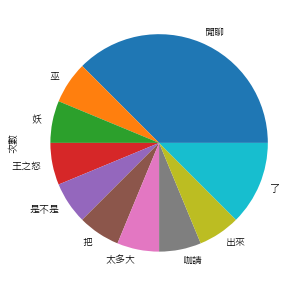

In [25]:
# 以圓餅圖呈現
# matplotlib 中文顯示問題
# https://ppt.cc/fTbrPx
plt.rcParams['axes.unicode_minus'] = False
df = df.set_index("單字").head(10)
df.plot(kind="pie", subplots=True, legend=False, figsize=(5,5))
plt.show()

In [28]:
# 使用wordcloud的generate_from_frequency生成文字雲

from wordcloud import WordCloud
#text = word_list
cloud = WordCloud(font_path="./Data/竹風體W4.ttc").generate_from_frequencies(dict_text)
cloud.to_file('output.png')

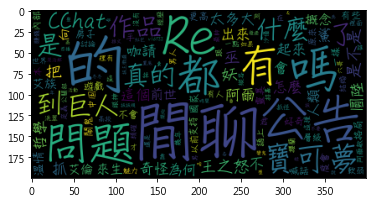

In [35]:
import matplotlib.image as img

image = img.imread('output.png')
plt.imshow(image)